<a href="https://colab.research.google.com/github/sneharc16/Basic-ML-Projects/blob/main/Implementing_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
Given a Salary dataset with years of experience and the corresponding salary, use an ML model to predict new salary of people based on some different years of experience.

Install the dataset from here: https://www.kaggle.com/datasets/shubham47/salary-data-dataset-for-linear-regression?resource=download

#Importing the Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
ds = pd.read_csv("/content/Salary_Data.csv.xls")
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [23]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [24]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

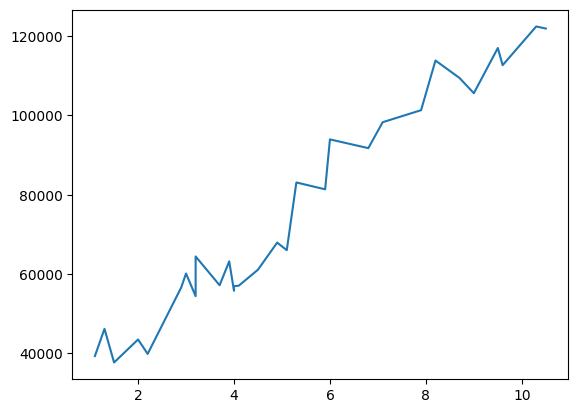

In [25]:
plt.plot(X,Y)

In [26]:
X = np.array(X)
Y = np.array(Y)

In [27]:
def mean(X):
    return np.sum(X)/len(X)

In [28]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [29]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X - mean_value)/np.sqrt(variance_value)

In [30]:
X_norm = norm(X)

In [31]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

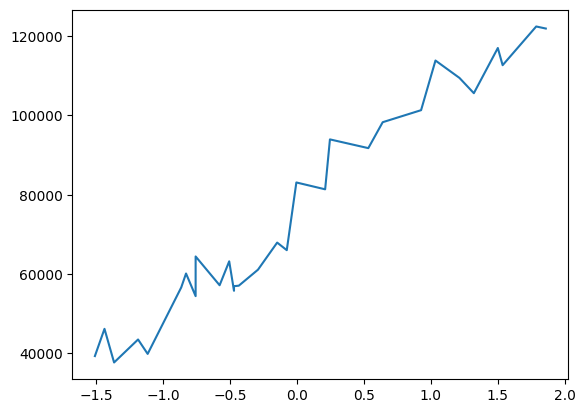

In [32]:
plt.plot(X_norm,Y)

In [33]:
import random

In [34]:
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self, X):
        return self.weight*X + self.bias
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n)) * np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n) * np.sum(errors*X)
            b_grad = (1/n) * np.sum(errors)
            self.weight += self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            curr_loss = (1/(2*n)) * np.sum(errors**2)
            if np.abs(curr_loss - prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

In [35]:
model = SimpleLR()

In [36]:
loss_history = model.fit(X_norm, Y)

In [37]:
loss_history

[3251498456.427297,
 2636684490.119727,
 2138685177.4105957,
 1735305734.1161993,
 1408568385.047738,
 1143911132.3022842,
 929538757.5784669,
 755897134.0521752,
 615247418.9958785,
 501321149.80027807,
 409040871.75184196,
 334293846.53260875,
 273748756.10502976,
 224707232.85869086,
 184983599.02915627,
 152807455.62723333,
 126744779.47167562,
 105634011.78567396,
 88534289.96001258,
 74683515.28122686,
 63464387.791410424,
 54376894.524659134,
 47016024.97859054,
 41053720.64627502,
 36224254.13709942,
 32312386.264667217,
 29143773.287997145,
 26577196.776894342,
 24498269.8029011,
 22814338.953966577,
 21450354.966329627,
 20345527.936343677,
 19450618.042055067,
 18725741.027681272,
 18138590.646038532,
 17662998.83690792,
 17277769.471512094,
 16965733.68554149,
 16712984.698905284,
 16508258.019729983,
 16342429.409597976,
 16208108.235391047,
 16099308.084283443,
 16011179.961886272,
 15939796.182744576,
 15881975.321639802,
 15835140.424144931,
 15797204.157174084,
 157664

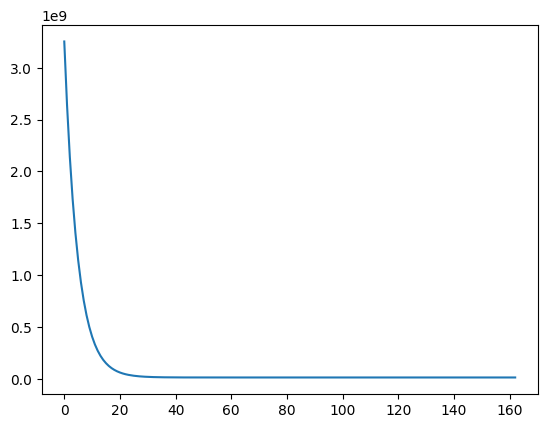

In [38]:
plt.plot(loss_history)

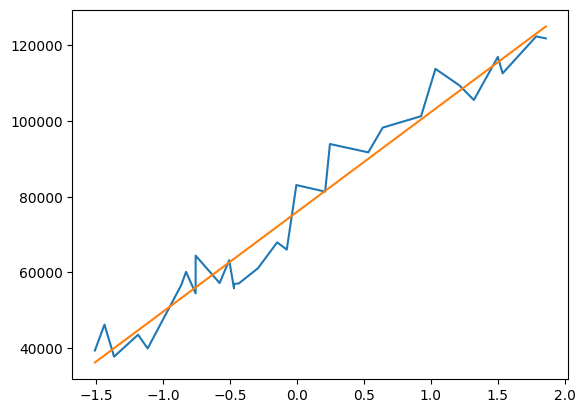

In [39]:
model.plot(X_norm,Y)